In [10]:

import argparse
import json
from urllib.parse import urlparse
from tld import get_fld
from matplotlib_venn import venn2
import matplotlib.pyplot as plt



In [2]:
# Code is from https://gist.github.com/tomatohater/8853161
def parse_har(harfile_path):
    """Reads a har file from the filesystem, converts to CSV, then dumps to
    stdout.
    """
    urls = []
    harfile = open(harfile_path)
    harfile_json = json.loads(harfile.read())
    i = 0

    for entry in harfile_json['log']['entries']:
        i = i + 1
        url = entry['request']['url']
        urlparts = urlparse(entry['request']['url'])
        size_bytes = entry['response']['bodySize']
        size_kilobytes = float(entry['response']['bodySize'])/1024
        mimetype = 'unknown'
        if 'mimeType' in entry['response']['content']:
            mimetype = entry['response']['content']['mimeType']
        urls.append(url)
        #print(f"{i}, {url}, {urlparts.hostname}, {size_bytes}")
    return urls

In [3]:
def get_domains(harfile_path, first_party_domains):
    urls = parse_har(harfile_path)
    domains = set()
    for url in urls:
        try:
            domain = get_fld(url)
            if domain not in first_party_domains:
                domains.add(domain)
        except Exception as e:
            print(f"invalid domain in {url}")
    return domains

In [21]:
print("Get Thrid Party Domains for CNN")
cnn_domains = get_domains('./www.cnn.com.har', ["cnn.com"])
print(cnn_domains)
print(f"CNN has {len(cnn_domains)} third part domains\n")


print("Get Thrid Party Domains for Macys")
macys_domains = get_domains('./www.macys.com.har', ["macys.com"])
print(macys_domains)
print(f"Macys has {len(macys_domains)} third part domains")


Get Thrid Party Domains for CNN
invalid domain in https://todo/?google_gid=CAESECD2O5xN3IZm4NHYL1az6ek&google_cver=1&google_push=AeyLB5c6ogjcdHvaAWC4o_iMmkq40-60yoAsz03koX6iroBLlxgzqJZV31BTJ4nlpedPWGjVgN1j-xohR4NRYH1NO00fviA6Deim
{'moatads.com', 'segment.com', 'tru.am', 'brealtime.com', 'google-analytics.com', 'serverbid.com', 'doubleclick.net', 'bidr.io', 'taboola.com', 'agkn.com', 'rubiconproject.com', 'casalemedia.com', 'gumgum.com', 'amazon-adsystem.com', 'krxd.net', 'google.com', 'dyntrk.com', '1rx.io', 'gstatic.com', 'resetdigital.co', 'lendingtree.com', 'adnxs.com', 'netmng.com', 'zemanta.com', 'criteo.com', 'adgrx.com', 'tapad.com', 'trustarc.com', 'bidswitch.net', 'gwallet.com', 'ugdturner.com', 'yieldoptimizer.com', 'segment.io', 'turner.com', 'truoptik.com', 'adsymptotic.com', '3lift.com', 'yahoo.com', 'bluekai.com', 'facebook.net', 'crwdcntrl.net', 'fwmrm.net', 'tidaltv.com', 'advertising.com', 'bidtheatre.com', 'jsdelivr.net', 'appier.net', 'bing.com', 'imrworldwide.com', 

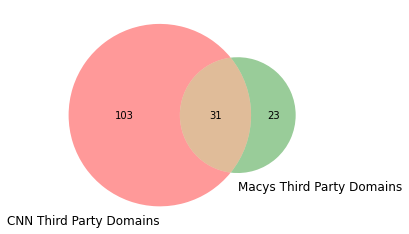

Shared Third Party Domains:
['google-analytics.com', 'doubleclick.net', 'taboola.com', 'agkn.com', 'rubiconproject.com', 'casalemedia.com', 'krxd.net', 'google.com', 'adnxs.com', 'criteo.com', 'tapad.com', 'bidswitch.net', 'yahoo.com', 'bluekai.com', 'facebook.net', 'bing.com', 'outbrain.com', 't.co', 'criteo.net', 'demdex.net', 'adform.net', 'ads-twitter.com', 'twitter.com', 'pubmatic.com', 'contextweb.com', 'everesttech.net', 'owneriq.net', 'mathtag.com', 'rlcdn.com', 'facebook.com', 'googletagmanager.com']


In [22]:
v = venn2([cnn_domains, macys_domains], 
          set_labels = ('CNN Third Party Domains', 'Macys Third Party Domains'))

labels = ['102', '31', '23']
#for label in labels:
#    v.get_label_by_id(label).set_text(label)
plt.show()


shared_third_party = [domain for domain in cnn_domains if domain in macys_domains]
print("Shared Third Party Domains:")
print(shared_third_party)